#### KNN(K-Nearest Neighbors)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### import library

In [9]:
# library & data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
# from sklearn.datasets import load_iris
# iris = load_iris()

# column of dataset
#names = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']
#dataset = pd.read_csv('/content/dmu_data/Iris.csv')
dataset = pd.read_csv('/content/drive/MyDrive/머신러닝/Data/iris.csv')

#### search of data

In [10]:
dataset
#print(dataset)
#dataset.info()
#dataset.describe()
#dataset.head(5)
dataset.tail()
dataset.columns
#dataset.shape
#dataset.dtypes
# dataset.isnull().sum()

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

null값이 없는지 확인 / 있다면 결측값 처리

In [11]:
dataset.isnull().sum()

,0
sepal.length,0
sepal.width,0
petal.length,0
petal.width,0
variety,0


### X와 y(target) 값 분리

In [12]:
# X와 y(target) 값 분리
X = dataset.iloc[0:, :-1].values   # 뒤에서 하나를 뺀 값을 가져와서 X에 저장
y = dataset.iloc[:,  4].values     # 열은 앞에서 다섯 번째 값만 가져와서 y에 저장

#X.shape
#X
#y.shape
#y
#print(X)
print(y)

['Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'V

In [13]:
set(y)

{'Setosa', 'Versicolor', 'Virginica'}

class 3개임을 확인

#### 기존에 데이터 split 은 training 80 % / test 20 % -> training dataset : 70% / test dataset : 30%  

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)   # test dataset 20% 사용

#X_train.shape
X_test.shape
#y_train.shape
#y_test.shape


(45, 4)

데이터 스케일링 -> StandardScaler을 통해 서로 다른 변수의 값 범위를 일정한 수준으로 맞춰주기

In [15]:
# Data Standardization(표준화) : Feature의 범위가 다른 경우에만 사용
from sklearn.preprocessing import StandardScaler
s = StandardScaler()              # 특성 스케일링(scaling), 평균이 0, 표준편차가 1이 되도록 변환
s.fit(X_train)        ## 교과서를 변경한 부분

X_train = s.transform(X_train)    # 훈련 데이터를 스케일링 처리
X_test = s.transform(X_test)      # 테스트 데이터를 스케일링 처리

#X_train
X_test


array([[-1.0672403 ,  0.95824302, -1.30104488, -0.8493086 ],
       [-1.30745516,  0.06189097, -1.30104488, -1.37776729],
       [-0.82702544,  0.95824302, -1.35837166, -1.37776729],
       [ 0.37404885, -1.95490113,  0.36143169,  0.33972344],
       [-0.94713287,  0.95824302, -1.41569844, -1.37776729],
       [-1.66777744, -1.73081311, -1.47302522, -1.24565262],
       [-0.58681058,  1.85459506, -1.47302522, -1.11353794],
       [-0.46670315, -1.05854908,  0.30410491, -0.05662057],
       [-0.58681058,  0.73415501, -1.35837166, -1.11353794],
       [-0.22648829, -0.61037306,  0.13212457,  0.0754941 ],
       [-1.18734773, -0.16219704, -1.41569844, -1.37776729],
       [ 1.33490828,  0.28597899,  0.47608524,  0.20760877],
       [-0.10638087, -0.83446107,  0.01747102, -0.05662057],
       [ 0.37404885, -0.61037306,  0.53341202,  0.73606745],
       [ 0.73437114, -0.16219704,  0.93469947,  0.73606745],
       [-1.30745516, -0.16219704, -1.41569844, -1.50988196],
       [-1.18734773,  0.

KNN 모델 생성
n_neighbors -> 50개로 생성

In [ ]:
# create model (KNN)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)          # K의값 :3,5,7,9,11,13,15,17,19......49
#y_train = y_train.astype(int)   # fix type error
knn.fit(X_train, y_train)

In [ ]:
# model accuracy
from sklearn import metrics
y_pred = knn.predict(X_test)
#y_test = y_test.astype(int)
print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

활용 : K(k-nearest neighbors 가장 근접한 이웃의 개수) 값을 조절해가면서 최적의 정확도를 도출할 수 있는 k값을 찾는 코드(loop 통해서)


또한, 해당 k값에 대한 accuracy를 시각화를 통해 찾기 편하게 나타냈습니다.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [26]:
# k 값은 1에서 50까지 조절해가면서 최적의 accuracy를 탐색
k_values = np.arange(2, 51, 1)
acc_array = np.zeros(len(k_values))

# K values 조절해가며 KNN 수행 및 accuracy 계산
# 해당 값들은 각각의 acc_array에 저장
for i, k in enumerate(k_values):
    classifier = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc_array[i] = metrics.accuracy_score(y_test, y_pred)


In [27]:
# Max accuracy 찾기 (array배열에 저장 시킨후, 그중에 가장 큰 값 확인)
max_acc = np.max(acc_array)
best_k = k_values[np.argmax(acc_array)]

시각화 -> 내가 k values를 조절해가며 찾았던 accuracy들을 시각화

가장 accuracy가 좋은 k value값에 빨간색 하이라이팅 포인트 주기

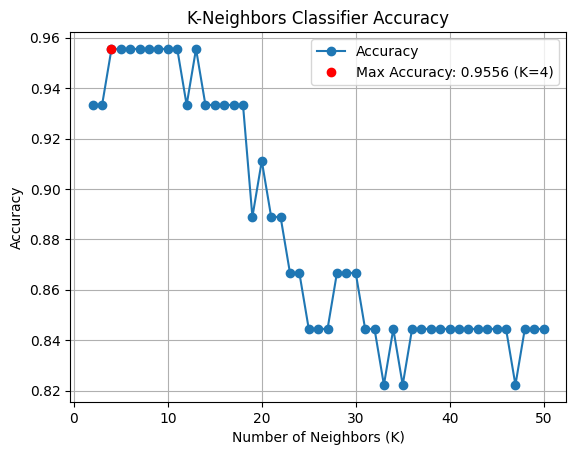

In [28]:
# Plot the accuracy against k_values
plt.plot(k_values, acc_array, marker='o', linestyle='-', label='Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('K-Neighbors Classifier Accuracy')
plt.grid(True)

# 가장 accuracy가 좋은 K value값에 그래프 위에 빨간색 하이라이팅 하기(시각화)
plt.plot(best_k, max_acc, 'ro', label=f'Max Accuracy: {max_acc:.4f} (K={best_k})')
plt.legend()
plt.show()

In [29]:
# best k 값과 그 accuracy 출력하기
print(f"The best K : {best_k}, 해당 accuracy : {max_acc:.4f}")

The best K : 4, 해당 accuracy : 0.9556


### 최적의 K값은 4이고, 해당 accuracy는 0.9556 입니다.